# Electric Vehicle Market Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
ev_data = pd.read_csv("Electric_Vehicle_Population_Data.csv")
pd.pandas.set_option("display.max_columns",None)
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [5]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [6]:
ev_data.shape

(177866, 17)

In [7]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [8]:
ev_data = ev_data.dropna()

In [9]:
ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [10]:
# For the task of market size of electric vehicles analysis, we can explore the following areas:

# 1. EV Adoption Over Time: Analyze the growth of the EV population by model year.
# 2. Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).
# 3. EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).
# 4. Make and Model Popularity: Identify the most popular makes and models among the registered EVs.
# 5. Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.
# 6. Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.

In [13]:
sns.set_style('whitegrid')

C:\Users\Sneha\AppData\Local\Temp\ipykernel_1556\1738989180.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ev_adoption_by_year.index, y = ev_adoption_by_year.values, palette = "viridis")


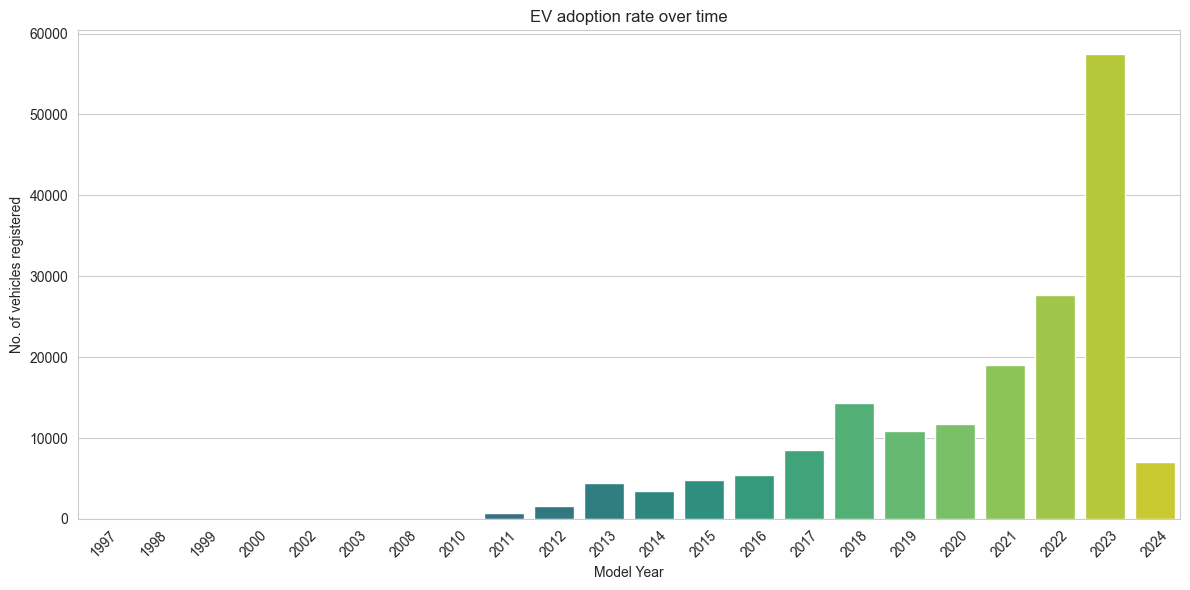

In [20]:
#EV adoption rate over time

plt.figure(figsize = (12,6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x = ev_adoption_by_year.index, y = ev_adoption_by_year.values, palette = "viridis")
plt.title("EV adoption rate over time")
plt.xlabel("Model Year")
plt.ylabel("No. of vehicles registered")
plt.xticks(rotation=45)     

# When we use plt.xticks(rotation=45) while visualizing with Seaborn, it helps to rotate the x-axis labels by 45 degrees. 
# This is especially useful when the labels on the x-axis (like names of months, cities, categories, etc.) are too long and start overlapping or 
# look cluttered. By rotating them, we make the chart more readable and neater, so that each label is clearly visible without overlapping with others

plt.tight_layout()
plt.show()

#### selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:

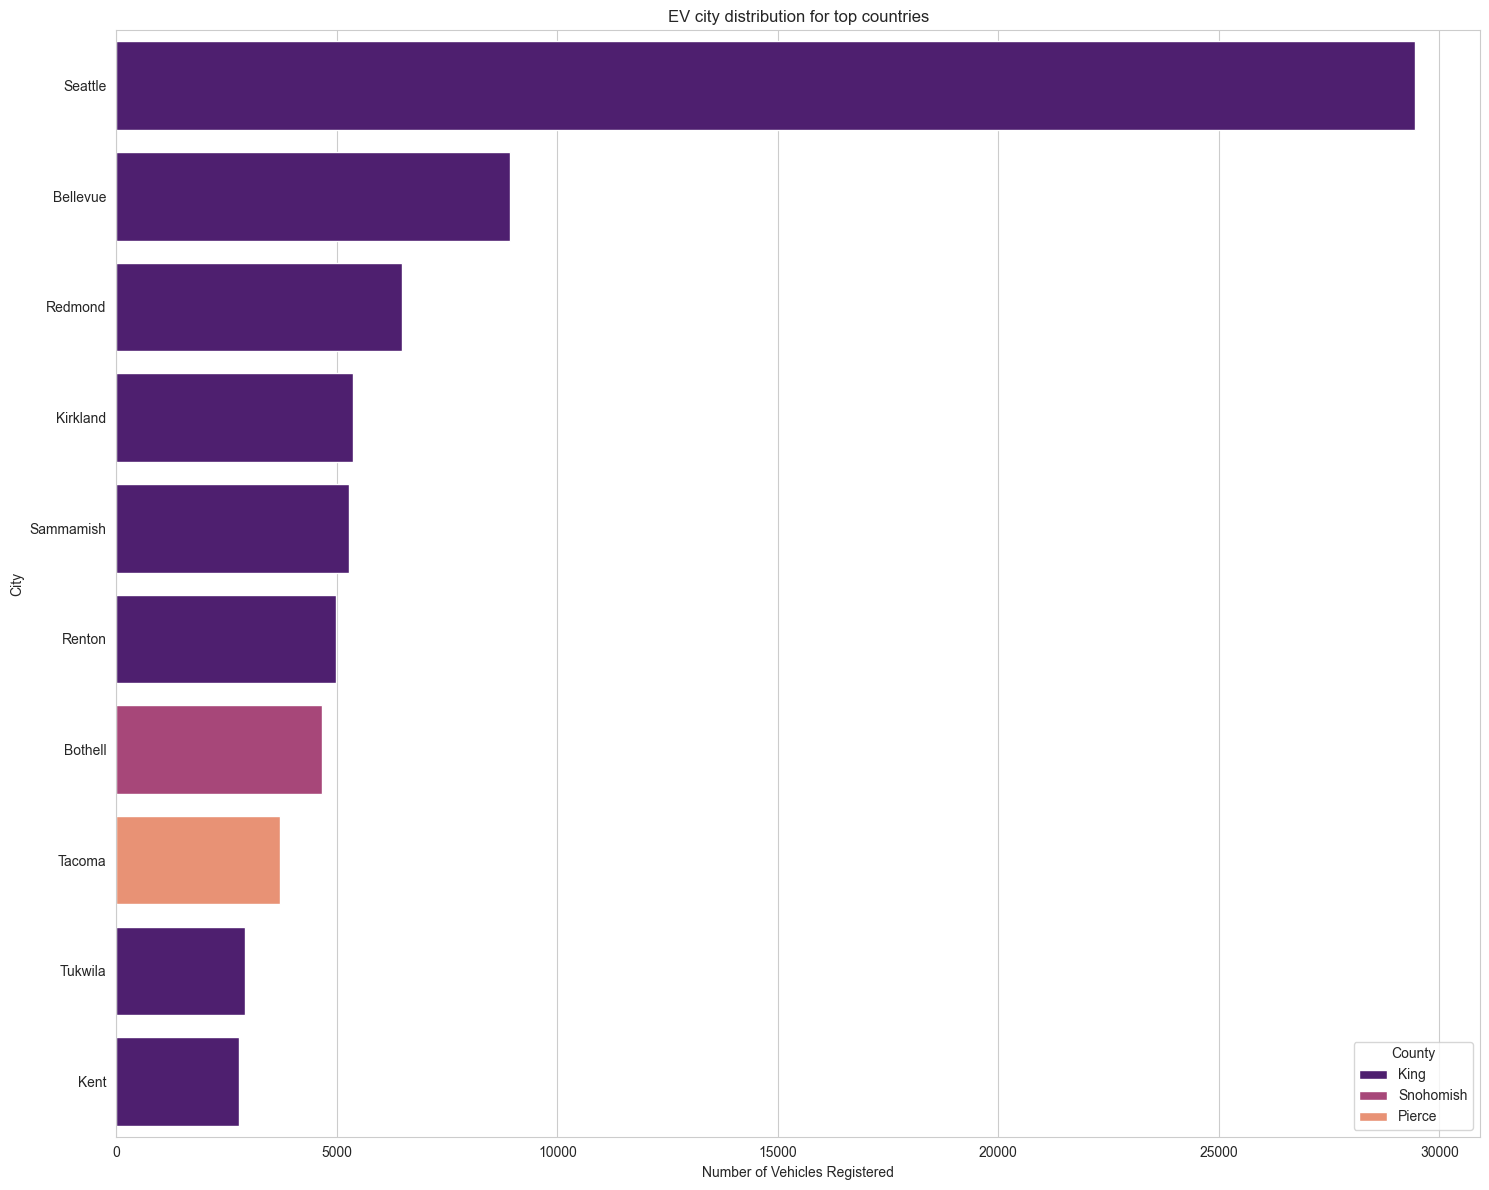

In [29]:
ev_country_distribution = ev_data['County'].value_counts()
top_countries = ev_country_distribution.head(3).index

top_countries_data = ev_data[ev_data['County'].isin(top_countries)]

# analyzing the distribution of EVs within the cities of these top counties

ev_city_distribution_top_countries = top_countries_data.groupby(['County','City']).size().sort_values(ascending = False).reset_index(name = 'Number of Vehicles')

top_cities = ev_city_distribution_top_countries.head(10)

plt.figure(figsize = (15,12))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title("EV city distribution for top countries")
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

#### let’s visualize the distribution of electric vehicle types to see which categories are most popular among the registered vehicles

In [39]:
ev_distribution_type = ev_data['Electric Vehicle Type'].unique()

In [40]:
ev_distribution_type

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

C:\Users\Sneha\AppData\Local\Temp\ipykernel_1556\970315701.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ev_distribution_type.index, y = ev_distribution_type.values, palette="rainbow")


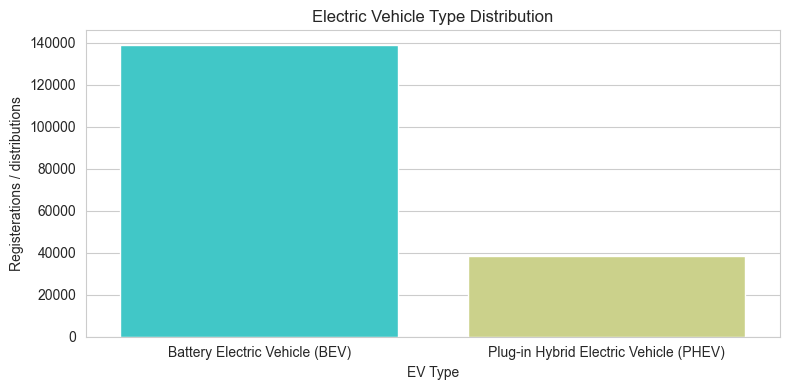

In [41]:
ev_distribution_type = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize = (8,4))
sns.barplot(x = ev_distribution_type.index, y = ev_distribution_type.values, palette="rainbow")
plt.title("Electric Vehicle Type Distribution")
plt.xlabel("EV Type")
plt.ylabel("Registerations / distributions")
plt.tight_layout()
plt.show()


#### let’s have a look at the most popular manufacturers and then drill down into the most popular models within those manufacturers

C:\Users\Sneha\AppData\Local\Temp\ipykernel_1556\1797474572.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ev_manufacturers.index, y = ev_manufacturers.values, palette = "rocket")


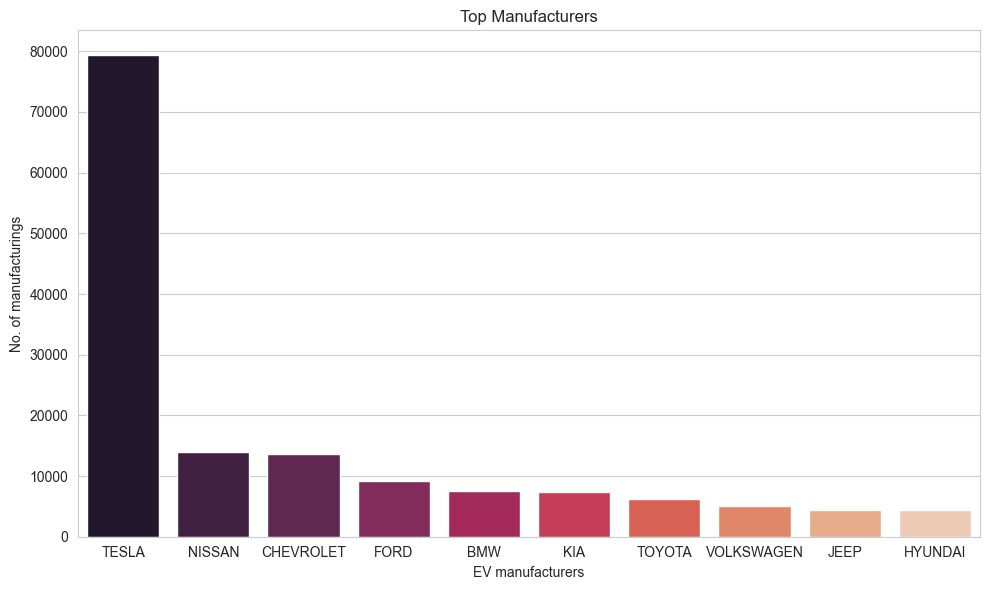

In [43]:
ev_manufacturers = ev_data['Make'].value_counts().head(10)

plt.figure(figsize = (10,6))
sns.barplot(x = ev_manufacturers.index, y = ev_manufacturers.values, palette = "rocket")
plt.title("Top Manufacturers")
plt.xlabel("EV manufacturers")
plt.ylabel("No. of manufacturings")
plt.tight_layout()
plt.show()

#### let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level

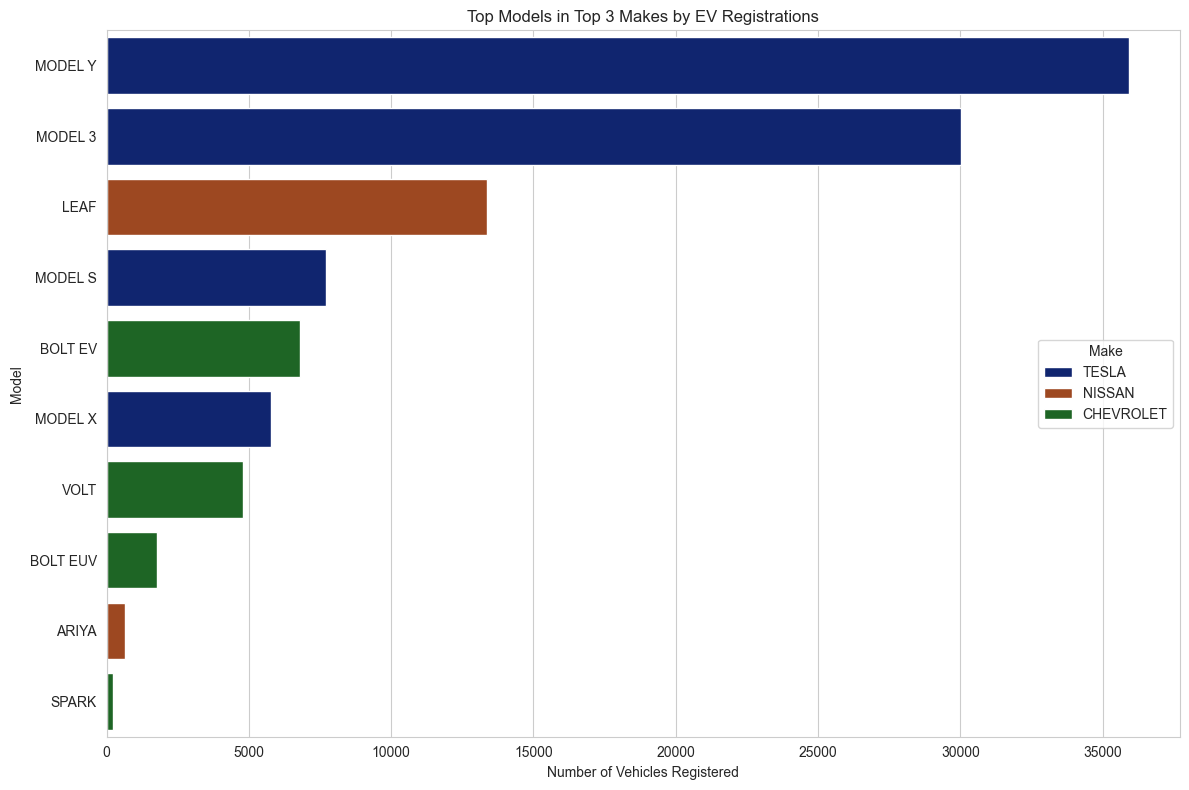

In [48]:
top_3_makes =  ev_manufacturers.head(3).index

top_makes = ev_data[ev_data['Make'].isin(top_3_makes)]

ev_distribution_top_3_makes = top_makes.groupby(['Make','Model']).size().sort_values(ascending = False).reset_index(name = "Number of Vehicles")

top_models = ev_distribution_top_3_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="dark")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()
